In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib as plt
from urllib.request import urlopen
from json import loads
import requests

%matplotlib inline

byear = 2010
eyear = 2016

df = pd.DataFrame()

for year in range(byear, eyear):

    url = "https://educationdata.urban.org/api/v1/schools/edfacts/assessments/" + str(year) + "/grade-8/sex/"
    response = requests.get(url)
    data = response.json()

    df_temp = pd.json_normalize(data['results'],max_level=0)
    scores_df = pd.concat([df, df_temp])


In [2]:
for year in range(byear, eyear):

    url = "https://educationdata.urban.org/api/v1/schools/nhgis/census-2010/" + str(year) + "/"
    response = requests.get(url)
    data = response.json()

    df_temp = pd.json_normalize(data['results'],max_level=0)
    geo_df = pd.concat([df, df_temp])

geo_df['ncessch_num'] = geo_df['ncessch'].astype('int64')  



In [3]:

for year in range(byear, eyear):
    url = "https://educationdata.urban.org/api/v1/schools/ccd/enrollment/" + str(year) + "/grade-8/"
    response = requests.get(url)
    data = response.json()

    df_temp = pd.json_normalize(data['results'],max_level=0)
    enrolled_df = pd.concat([df, df_temp])

In [13]:


for year in range(byear, eyear):
    url = "https://educationdata.urban.org/api/v1/schools/crdc/school-finance/" + str(year) + "/"
    response = requests.get(url)
    data = response.json()

    df_temp = pd.json_normalize(data['results'],max_level=0)
    finance_df = pd.concat([df, df_temp])

    
finance_df = finance_df[finance_df['ncessch'] != '']
    
finance_df['ncessch_num'] = finance_df['ncessch'].astype('int64')  
    


In [14]:
finance_df

,crdc_id,year,ncessch,leaid,fips,salaries_teachers,salaries_total,salaries_instruc_staff,salaries_instructional_aides,salaries_support,salaries_administration,expenditures_nonpersonnel,instructional_aides_fte,support_fte,administration_fte,ncessch_num
0,010000201705,2015,010000201705,0100002,1,1768550,1918550.000,None,0.000,0.000,77518.000,567765.000,0.000,0.000,1.000,10000201705
1,010000201706,2015,010000201706,0100002,1,133728,133728.000,None,0.000,22717.000,154000.000,542846.000,0.000,1.000,2.000,10000201706
2,010000201876,2015,010000201876,0100002,1,3136000,3766998.000,None,0.000,22000.000,630000.000,1666000.000,0.000,1.000,7.000,10000201876
4,010000500870,2015,010000500870,0100005,1,1556834,1556834.000,None,0.000,194687.000,560016.000,476502.000,0.000,4.510,6.000,10000500870
5,010000500871,2015,010000500871,0100005,1,3402389,3402389.000,None,0.000,560016.000,507538.000,1750069.000,0.000,10.210,9.000,10000500871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,120048000695,2015,120048000695,1200480,12,645741,931867.190,None,18368.740,113000.000,154757.240,139099.000,1.000,2.000,2.000,120048000695
19996,120048000697,2015,120048000697,1200480,12,1258590,1588790.650,None,48212.220,129800.490,152187.050,202426.000,4.000,3.000,2.000,120048000697
19997,120048000698,2015,120048000698,1200480,12,1089028,1383559.860,None,23111.780,127748.610,143671.200,139641.000,1.000,3.000,2.000,120048000698
19998,120048000699,2015,120048000699,1200480,12,710992,907211.470,None,11618.530,40800.000,143800.190,133567.000,1.000,1.000,2.000,120048000699


In [8]:
for year in range(byear, eyear):
    url = "https://educationdata.urban.org/api/v1/schools/meps/" + str(year) + "/"

    response = requests.get(url)
    data = response.json()

    df_temp = pd.json_normalize(data['results'],max_level=0)
    poverty_df = pd.concat([df, df_temp])
    
poverty_df['ncessch_num'] = poverty_df['ncessch'].astype('int64')
 

In [24]:
new_df1 = enrolled_df.merge(scores_df, on='ncessch_num', how='inner')

In [25]:
new_df1.head()

,year_x,ncessch_x,ncessch_num,grade,race_x,sex_x,enrollment,fips_x,leaid_x,year_y,...,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt,ncessch_y,leaid_y
0,2015,010000500870,10000500870,8,99,99,333,1,100005,2015,...,326.0,40.0,40.0,40.0,334.0,29.0,29.0,29.0,010000500870,0100005
1,2015,010000500870,10000500870,8,99,99,333,1,100005,2015,...,164.0,40.0,44.0,42.0,166.0,30.0,34.0,32.0,010000500870,0100005
2,2015,010000500870,10000500870,8,99,99,333,1,100005,2015,...,162.0,35.0,39.0,37.0,168.0,25.0,29.0,27.0,010000500870,0100005
3,2015,010000600193,10000600193,8,99,99,111,1,100006,2015,...,115.0,50.0,54.0,52.0,115.0,30.0,34.0,32.0,010000600193,0100006
4,2015,010000600193,10000600193,8,99,99,111,1,100006,2015,...,55.0,60.0,69.0,64.5,55.0,30.0,39.0,34.5,010000600193,0100006


In [26]:
new_df2 = new_df1.merge(finance_df, on='ncessch_num', how='inner')

In [27]:
new_df2.head()

,year_x,ncessch_x,ncessch_num,grade,race_x,sex_x,enrollment,fips_x,leaid_x,year_y,...,salaries_teachers,salaries_total,salaries_instruc_staff,salaries_instructional_aides,salaries_support,salaries_administration,expenditures_nonpersonnel,instructional_aides_fte,support_fte,administration_fte
0,2015,010000500870,10000500870,8,99,99,333,1,100005,2015,...,1556834,1556834.000,None,0.000,194687.000,560016.000,476502.000,0.000,4.510,6.000
1,2015,010000500870,10000500870,8,99,99,333,1,100005,2015,...,1556834,1556834.000,None,0.000,194687.000,560016.000,476502.000,0.000,4.510,6.000
2,2015,010000500870,10000500870,8,99,99,333,1,100005,2015,...,1556834,1556834.000,None,0.000,194687.000,560016.000,476502.000,0.000,4.510,6.000
3,2015,010000600193,10000600193,8,99,99,111,1,100006,2015,...,1167653,1448702.040,None,43668.000,119052.000,95122.000,465239.000,2.000,7.330,1.000
4,2015,010000600193,10000600193,8,99,99,111,1,100006,2015,...,1167653,1448702.040,None,43668.000,119052.000,95122.000,465239.000,2.000,7.330,1.000


In [28]:
new_df3 = new_df2.merge(poverty_df, on='ncessch_num', how='inner')

C:\Users\stacy\AppData\Local\Temp\ipykernel_3576\1458118769.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ncessch_x', 'fips_x', 'leaid_x', 'year_x'} in the result is deprecated and will raise a MergeError in a future version.
  new_df3 = new_df2.merge(poverty_df, on='ncessch_num', how='inner')


In [29]:
new_df3.shape

(16225, 59)

In [31]:
new_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16225 entries, 0 to 16224
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year_x                        16225 non-null  int64  
 1   ncessch_x                     16225 non-null  object 
 2   ncessch_num                   16225 non-null  int64  
 3   grade                         16225 non-null  int64  
 4   race_x                        16225 non-null  int64  
 5   sex_x                         16225 non-null  int64  
 6   enrollment                    16225 non-null  int64  
 7   fips_x                        16225 non-null  int64  
 8   leaid_x                       16225 non-null  object 
 9   year_y                        16225 non-null  int64  
 10  school_name                   16225 non-null  object 
 11  leaid_num                     16225 non-null  int64  
 12  lea_name                      16225 non-null  object 
 13  f

In [32]:
master_df = new_df3.copy()

<AxesSubplot:>

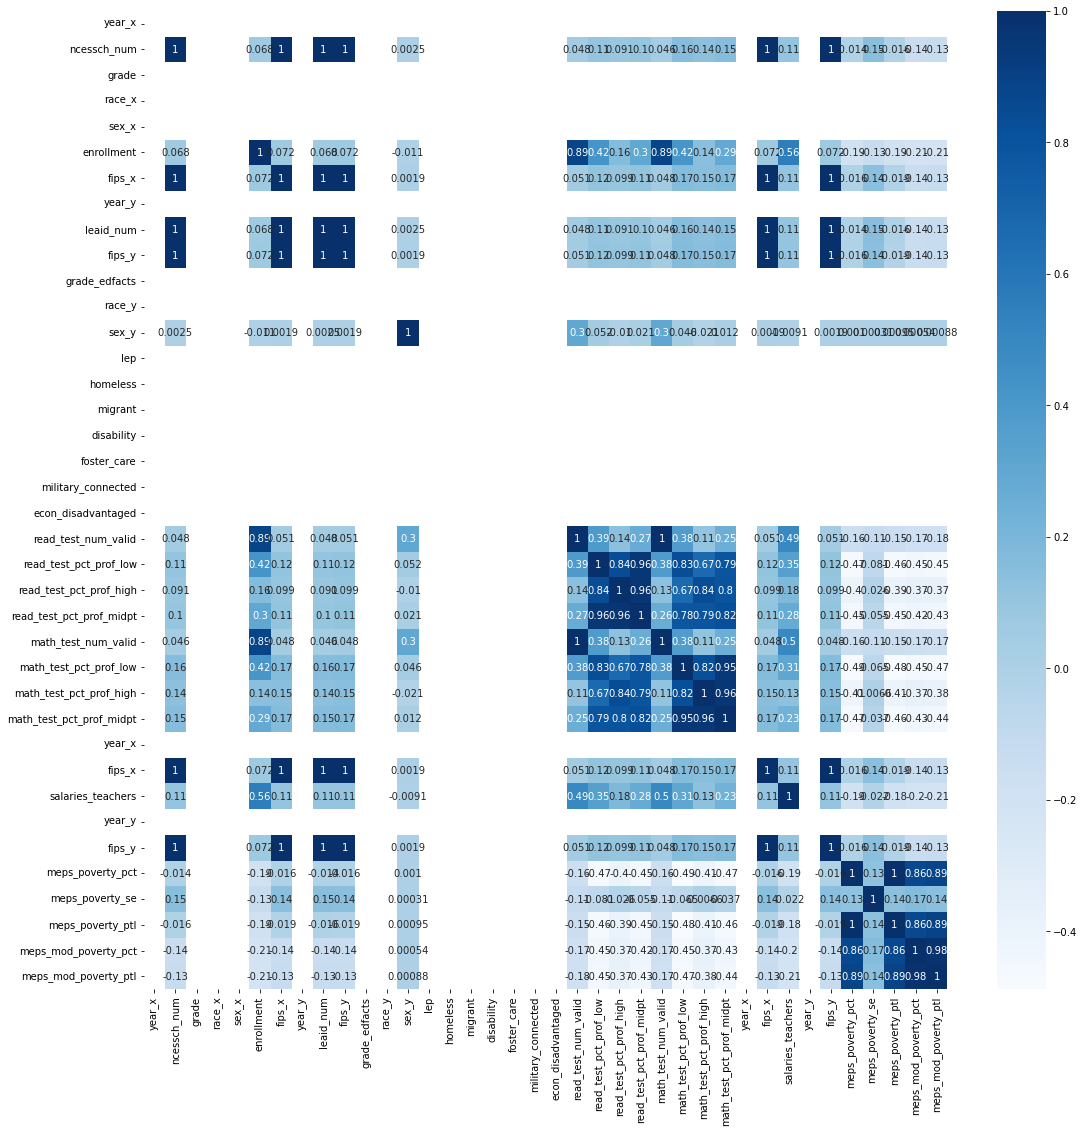

In [38]:
import seaborn as sb
import matplotlib.pyplot as plt
corr = master_df.corr()
fig, ax = plt.subplots(figsize=(18,18)) 
sb.heatmap(corr, cmap="Blues", annot=True)

In [39]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16225 entries, 0 to 16224
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year_x                        16225 non-null  int64  
 1   ncessch_x                     16225 non-null  object 
 2   ncessch_num                   16225 non-null  int64  
 3   grade                         16225 non-null  int64  
 4   race_x                        16225 non-null  int64  
 5   sex_x                         16225 non-null  int64  
 6   enrollment                    16225 non-null  int64  
 7   fips_x                        16225 non-null  int64  
 8   leaid_x                       16225 non-null  object 
 9   year_y                        16225 non-null  int64  
 10  school_name                   16225 non-null  object 
 11  leaid_num                     16225 non-null  int64  
 12  lea_name                      16225 non-null  object 
 13  f

In [42]:
master_df = master_df.drop(['leaid_y','ncessch_y','gleaid','fips_y','year_y','administration_fte','support_fte'], axis=1)

In [43]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16225 entries, 0 to 16224
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year_x                        16225 non-null  int64  
 1   ncessch_x                     16225 non-null  object 
 2   ncessch_num                   16225 non-null  int64  
 3   grade                         16225 non-null  int64  
 4   race_x                        16225 non-null  int64  
 5   sex_x                         16225 non-null  int64  
 6   enrollment                    16225 non-null  int64  
 7   fips_x                        16225 non-null  int64  
 8   leaid_x                       16225 non-null  object 
 9   school_name                   16225 non-null  object 
 10  leaid_num                     16225 non-null  int64  
 11  lea_name                      16225 non-null  object 
 12  grade_edfacts                 16225 non-null  int64  
 13  r

In [45]:
master_df = master_df.drop(['instructional_aides_fte','expenditures_nonpersonnel','fips_x','leaid_x','ncessch_x','year_x','crdc_id'], axis=1)

In [46]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16225 entries, 0 to 16224
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ncessch_num                   16225 non-null  int64  
 1   grade                         16225 non-null  int64  
 2   race_x                        16225 non-null  int64  
 3   sex_x                         16225 non-null  int64  
 4   enrollment                    16225 non-null  int64  
 5   school_name                   16225 non-null  object 
 6   leaid_num                     16225 non-null  int64  
 7   lea_name                      16225 non-null  object 
 8   grade_edfacts                 16225 non-null  int64  
 9   race_y                        16225 non-null  int64  
 10  sex_y                         16225 non-null  int64  
 11  lep                           16225 non-null  int64  
 12  homeless                      16225 non-null  int64  
 13  m

In [47]:
master_df = master_df.drop(['econ_disadvantaged','military_connected','foster_care','disability','migrant','homeless','lep'], axis=1)

In [48]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16225 entries, 0 to 16224
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ncessch_num                   16225 non-null  int64  
 1   grade                         16225 non-null  int64  
 2   race_x                        16225 non-null  int64  
 3   sex_x                         16225 non-null  int64  
 4   enrollment                    16225 non-null  int64  
 5   school_name                   16225 non-null  object 
 6   leaid_num                     16225 non-null  int64  
 7   lea_name                      16225 non-null  object 
 8   grade_edfacts                 16225 non-null  int64  
 9   race_y                        16225 non-null  int64  
 10  sex_y                         16225 non-null  int64  
 11  read_test_num_valid           16191 non-null  float64
 12  read_test_pct_prof_low        16191 non-null  float64
 13  r

In [49]:
master_df = master_df.drop(['leaid_num','lea_name'], axis=1)

In [51]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16225 entries, 0 to 16224
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ncessch_num                   16225 non-null  int64  
 1   grade                         16225 non-null  int64  
 2   race_x                        16225 non-null  int64  
 3   sex_x                         16225 non-null  int64  
 4   enrollment                    16225 non-null  int64  
 5   school_name                   16225 non-null  object 
 6   grade_edfacts                 16225 non-null  int64  
 7   race_y                        16225 non-null  int64  
 8   sex_y                         16225 non-null  int64  
 9   read_test_num_valid           16191 non-null  float64
 10  read_test_pct_prof_low        16191 non-null  float64
 11  read_test_pct_prof_high       16191 non-null  float64
 12  read_test_pct_prof_midpt      16191 non-null  float64
 13  m

In [52]:
master_df = master_df.drop(['grade','race_x','sex_x','grade_edfacts','race_y','sex_y'], axis=1)

<AxesSubplot:>

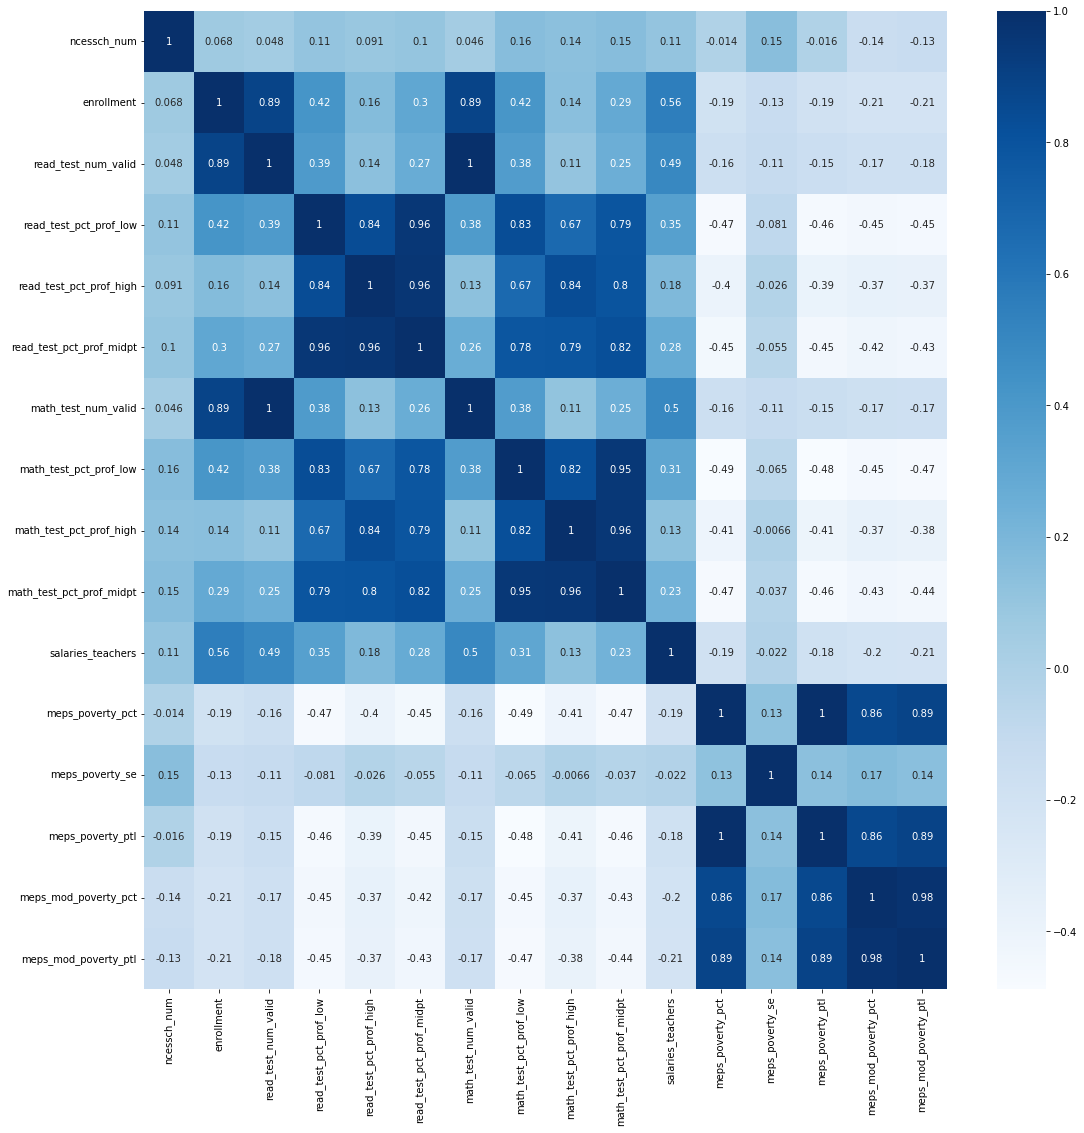

In [53]:
corr = master_df.corr()
fig, ax = plt.subplots(figsize=(18,18)) 
sb.heatmap(corr, cmap="Blues", annot=True)

In [56]:
master_df['meps_mod_poverty_pct'].fillna(value=master_df['meps_mod_poverty_pct'].mean(), inplace=True)

In [57]:
master_df['math_test_pct_prof_low'].fillna(value=master_df['math_test_pct_prof_low'].mean(), inplace=True)

In [60]:
from scipy.stats import pearsonr, spearmanr
# calculate Pearson's correlation
corr, _ = spearmanr(master_df.meps_mod_poverty_pct, master_df.math_test_pct_prof_low)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.395
